In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


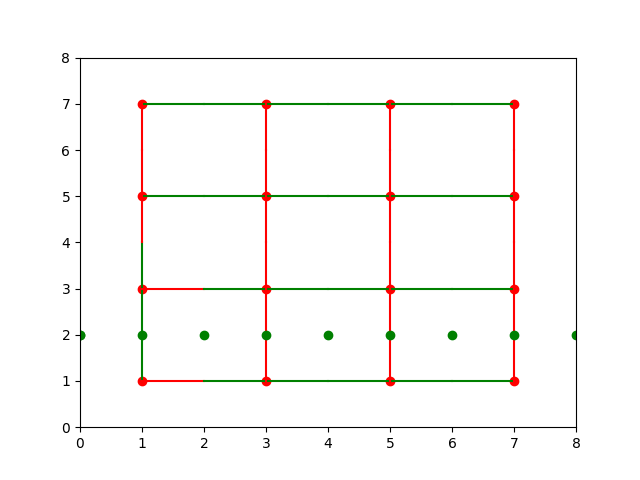

In [8]:
import matplotlib.pyplot as plt;
import matplotlib.animation as animation;
import random;

class Intersection:
    def __init__(self, x, y, flow):
        self.flow = flow;
        self.x = x;
        self.y = y;
    def __repr__(self):
        return "x: " + str(self.x) + " y: " + str(self.y) + " flow: " + str(self.flow);
    def __str__(self):
        return "x: " + str(self.x) + " y: " + str(self.y) + " flow: " + str(self.flow);
    
class Vehicle:
    def __init__(self, speed):
        self.speed = speed;
        
    
    
def createIntersections(rows, cols=0, flow=[]):
    if(rows < 1 and cols < 1):
        return;
    
    if(rows > 10):
        rows = 10;
    if(cols > 10):
        cols = 10;
        
    intersections = [];
    random.seed();
    
    x = 1;
    y = 1;
    step = 2;
    flowIndex = 0;
    if(cols == 0):
        cols = rows;
        
    for i in range(rows):
        for j in range(cols):
            if(len(flow) == 0):
                intersections.append(Intersection(x, y, random.randint(0, 1)));
            else:
                intersections.append(Intersection(x, y, flow[flowIndex]));
                flowIndex += 1;
            x+=step;
            
        y+=step;
        x = 1;
        
    return intersections;
    
def getIntersectionRows(intersections):
    rows = 1;
    y = intersections[0].y;
    for i in range(len(intersections)):
        if(intersections[i].y != y):
            y = intersections[i].y;
            rows+=1;
    
    return rows;
    
def getIntersectionColumns(intersections):
    cols = 0;
    x = 0;
    for i in range(len(intersections)):
        if(intersections[i].x >= x):
            x = intersections[i].x;
            cols+=1;
        else:
            break;
            
    return cols;
    
def plotIntersections(intersections):
    xAxis = [];
    yAxis = [];
    
    for i in range(len(intersections)):
        xAxis.append(intersections[i].x);
        yAxis.append(intersections[i].y);
    
    plt.plot(xAxis, yAxis, 'ro');
    plt.axis([0, (intersections[len(intersections)-1].x) + 1, 0, (intersections[len(intersections)-1].y) + 1]);
    
def plotFlow(intersections):    
    rows = getIntersectionRows(intersections);
    cols = getIntersectionColumns(intersections);
    
    for i in range(len(intersections)):
        currentRow = int(i / cols);
        if(intersections[i].flow):
            if(i + cols < len(intersections)):
                plt.plot([intersections[i].x, intersections[i+cols].x], [intersections[i].y, (intersections[i].y + intersections[i+cols].y) / 2], "g-");
            if(i - cols >= 0):
                plt.plot([intersections[i].x, intersections[i-cols].x], [intersections[i].y, (intersections[i].y + intersections[i-cols].y) / 2], "g-");
            if(i - (currentRow*cols) - 1 >= 0):
                plt.plot([intersections[i].x, (intersections[i].x + intersections[i-1].x) / 2], [intersections[i].y, intersections[i-1].y], "r-");
            if(i - (currentRow*cols) + 1 < cols):
                plt.plot([intersections[i].x, (intersections[i].x + intersections[i+1].x) / 2], [intersections[i].y, intersections[i+1].y], "r-");
        else:
            if(i - (currentRow*cols) - 1 >= 0):
                plt.plot([intersections[i].x, (intersections[i].x + intersections[i-1].x) / 2], [intersections[i].y, intersections[i-1].y], "g-");
            if(i - (currentRow*cols) + 1 < cols):
                plt.plot([intersections[i].x, (intersections[i].x + intersections[i+1].x) / 2], [intersections[i].y, intersections[i+1].y], "g-");     
            if(i + cols < len(intersections)):
                plt.plot([intersections[i].x, intersections[i+cols].x], [intersections[i].y, (intersections[i].y + intersections[i+cols].y) / 2], "r-");
            if(i - cols >= 0):
                plt.plot([intersections[i].x, intersections[i-cols].x], [intersections[i].y, (intersections[i].y + intersections[i-cols].y) / 2], "r-");
    
def animationFunction(i):
    plt.plot(i, [2], 'go');

    
fig, ax = plt.subplots();
ani = animation.FuncAnimation(fig, animationFunction, interval=500);
    
customFlow = [ 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ];
intersections = createIntersections(4, 4, customFlow);
plotIntersections(intersections);
plotFlow(intersections);
plt.show();

<IPython.core.display.Javascript object>


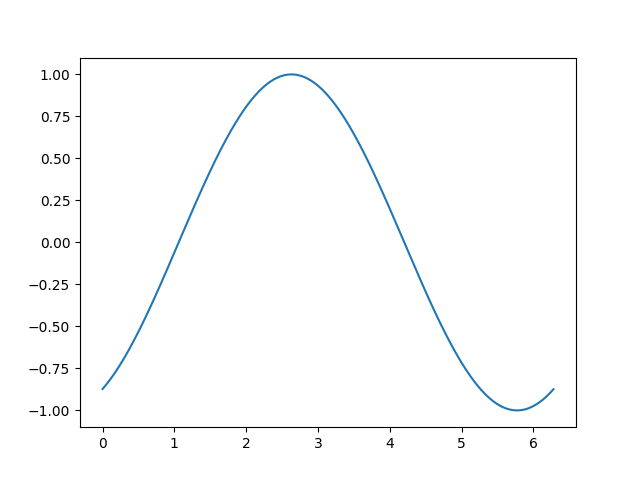

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()